<a href="https://colab.research.google.com/github/ZiyadBastaili/Parkinson-Disease-Detection/blob/main/Detection_of_parkinson_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U plotly

     |████████████████████████████████| 26.5 MB 1.6 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
#load all modules
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, VotingClassifier
from pprint import pprint

The target is 'status', 1 = has Parkinsons, 0 = does not have Parkinsons.

This is a binary classification problem.

The target is imbalanced, I will use f1 score and the confusion matrix to measure the model.

I will use a random split to do a train/test split on the model, and use cross validation.

In [ ]:
#read csv file of parkison's dataset
try:
    df = pd.read_csv("parkinsons.csv")
except:
    df = pd.read_csv('https://raw.githubusercontent.com/TemsyChen/Lambda_Unit2_Build/main/parkinsons.data')
df.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  ...   spread2        D2       PPE
0  phon_R01_S01_1      119.992       157.302  ...  0.266482  2.301442  0.284654
1  phon_R01_S01_2      122.400       148.650  ...  0.335590  2.486855  0.368674
2  phon_R01_S01_3      116.682       131.111  ...  0.311173  2.342259  0.332634
3  phon_R01_S01_4      116.676       137.871  ...  0.334147  2.405554  0.368975
4  phon_R01_S01_5      116.014       141.781  ...  0.234513  2.332180  0.410335

[5 rows x 24 columns]

In [ ]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [ ]:
# Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
df.describe()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  ...          D2         PPE
count   195.000000    195.000000  ...  195.000000  195.000000
mean    154.228641    197.104918  ...    2.381826    0.206552
std      41.390065     91.491548  ...    0.382799    0.090119
min      88.333000    102.145000  ...    1.423287    0.044539
25%     117.572000    134.862500  ...    2.099125    0.137451
50%     148.790000    175.829000  ...    2.361532    0.194052
75%     182.769000    224.205500  ...    2.636456    0.252980
max     260.105000    592.030000  ...    3.671155    0.527367

[8 rows x 23 columns]

In [ ]:
# Checking null value sum
df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [ ]:
df.shape

(195, 24)

In [ ]:
# Checking status 
df.status.value_counts()

1    147
0     48
Name: status, dtype: int64

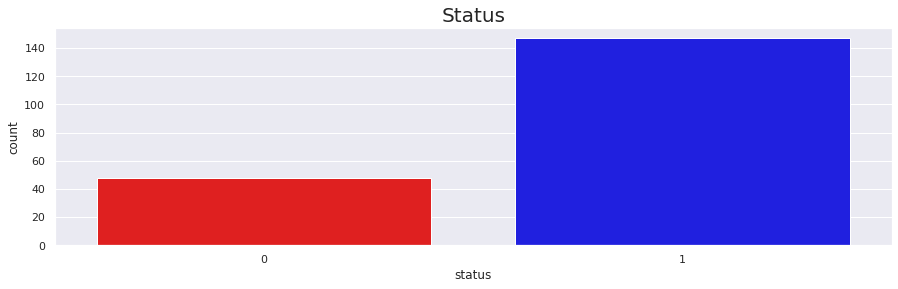

In [ ]:
plt.figure(figsize=(15,4))
sns.set(style="darkgrid")
sns.countplot(x="status",data=df,palette=["Red","Blue"])
plt.title("Status",size=20)
plt.show()

In [ ]:
# grouping the data bas3ed on the target variable
df.groupby('status').mean()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  ...   spread2        D2       PPE
status                                           ...                              
0        181.937771    223.636750    145.207292  ...  0.160292  2.154491  0.123017
1        145.180762    188.441463    106.893558  ...  0.248133  2.456058  0.233828

[2 rows x 22 columns]

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    #df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [ ]:
df_features = df.drop(['name','status'],axis=1)
df_target = df.status

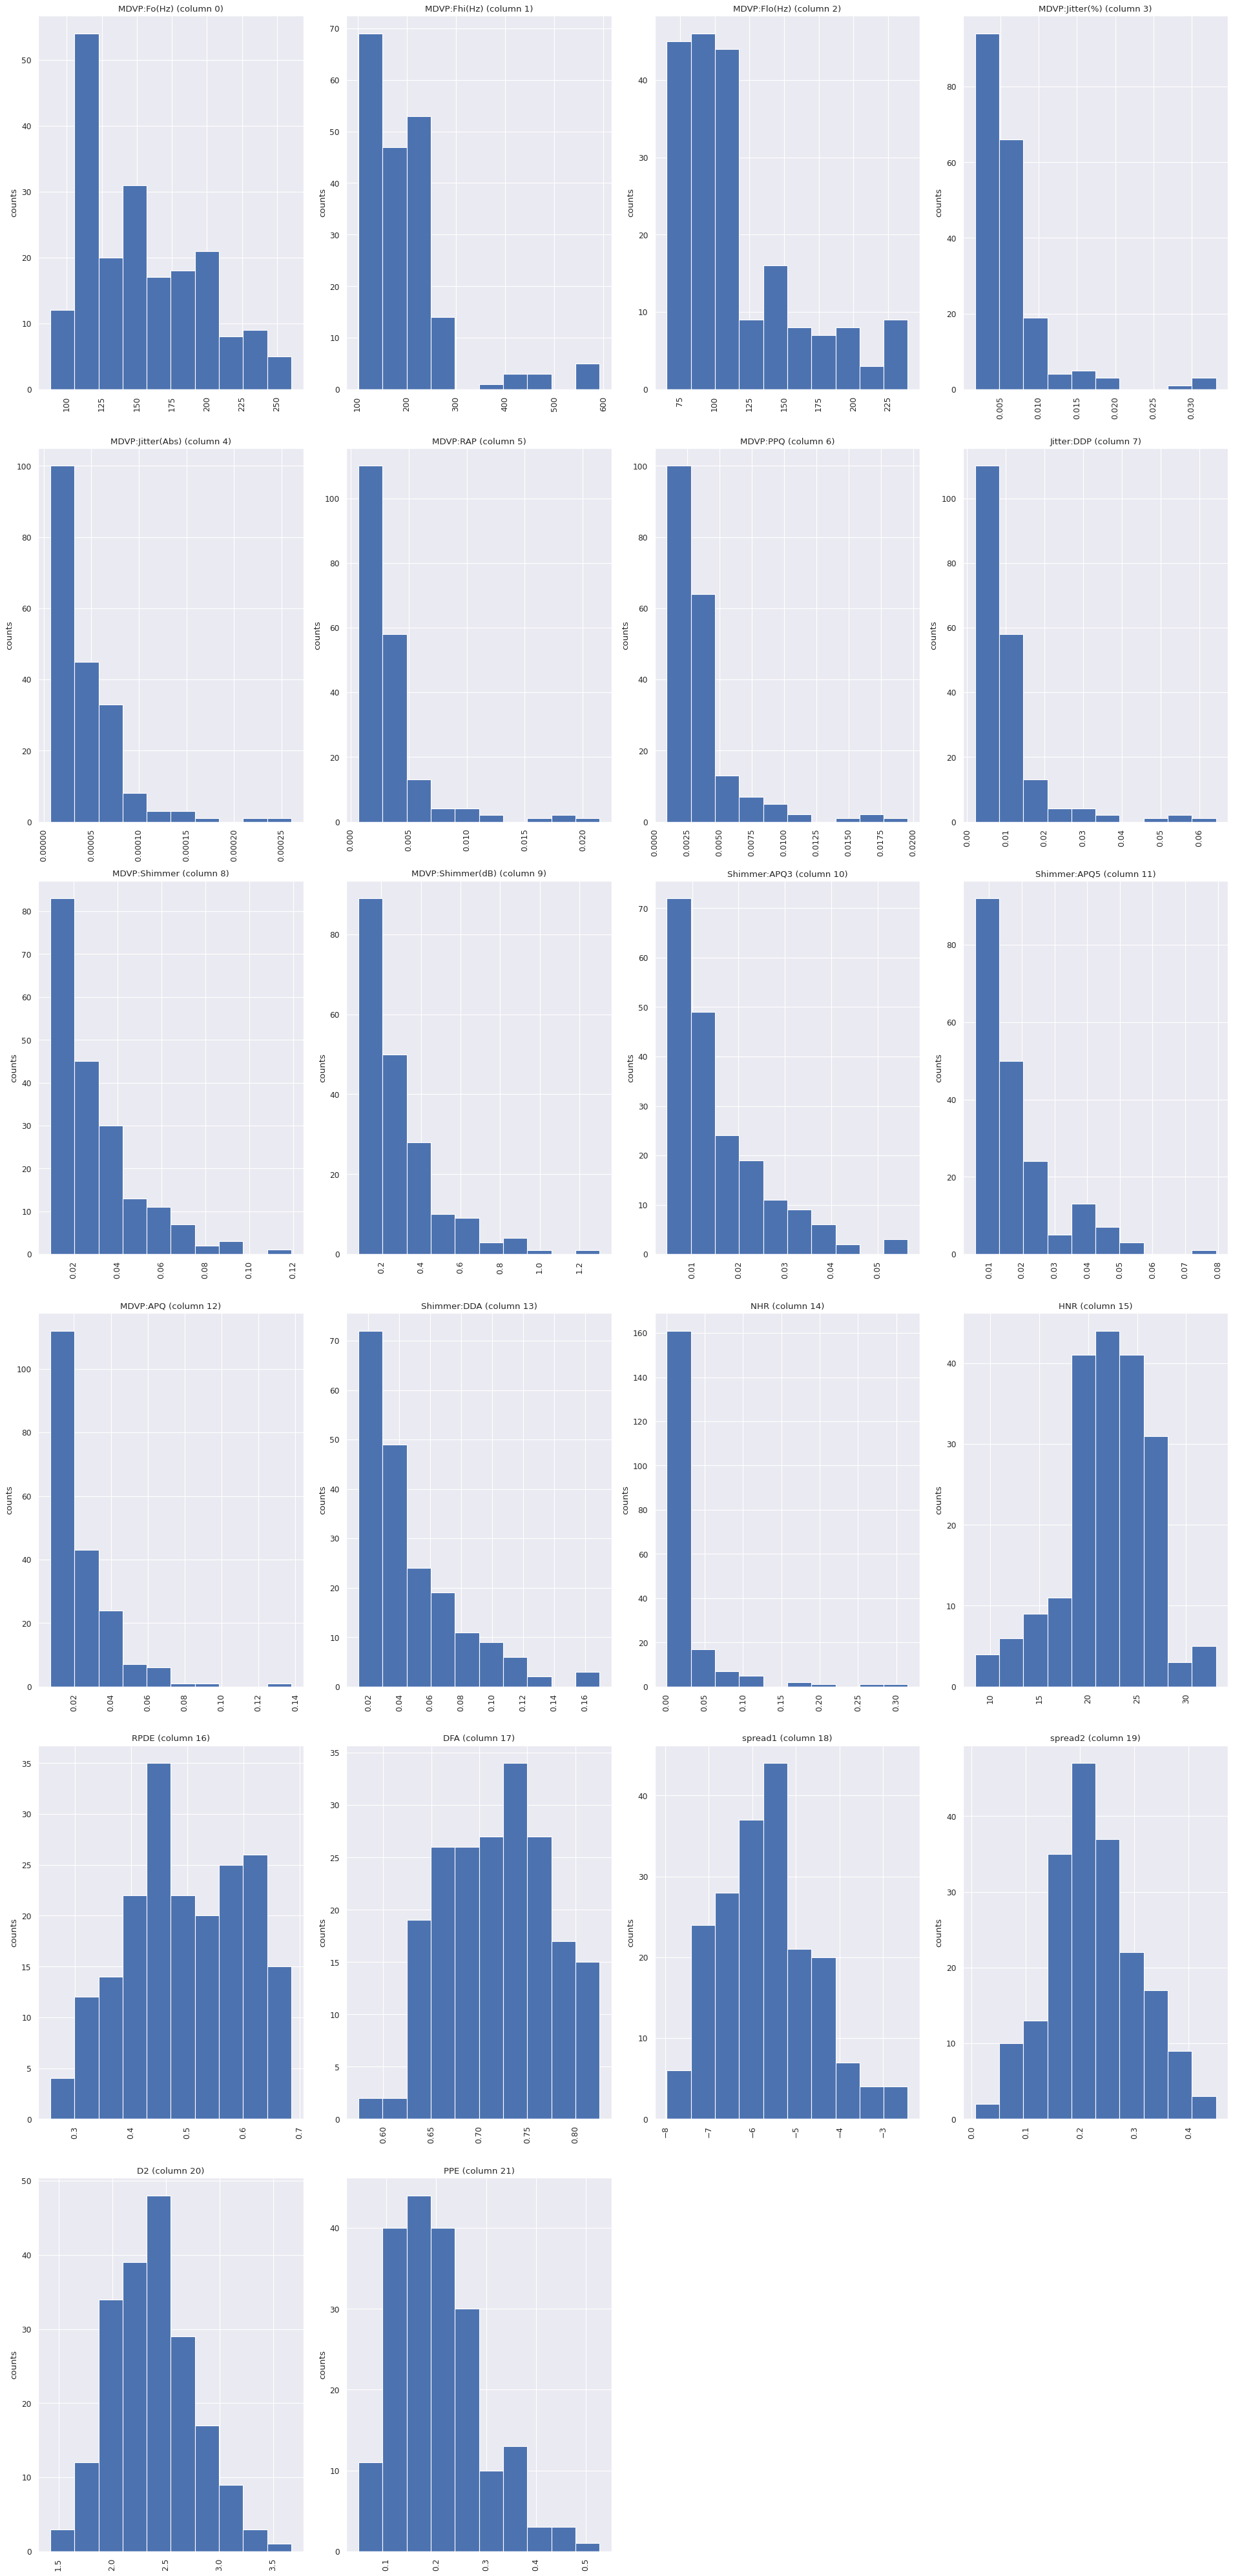

In [ ]:
plotPerColumnDistribution(df_features, len(df_features), 4)

In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    #if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
    #    columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.5, 0.8), xycoords='axes fraction', ha='center', va='center', size=textSize)
    #plt.suptitle('Scatter and Density Plot')
    plt.show()

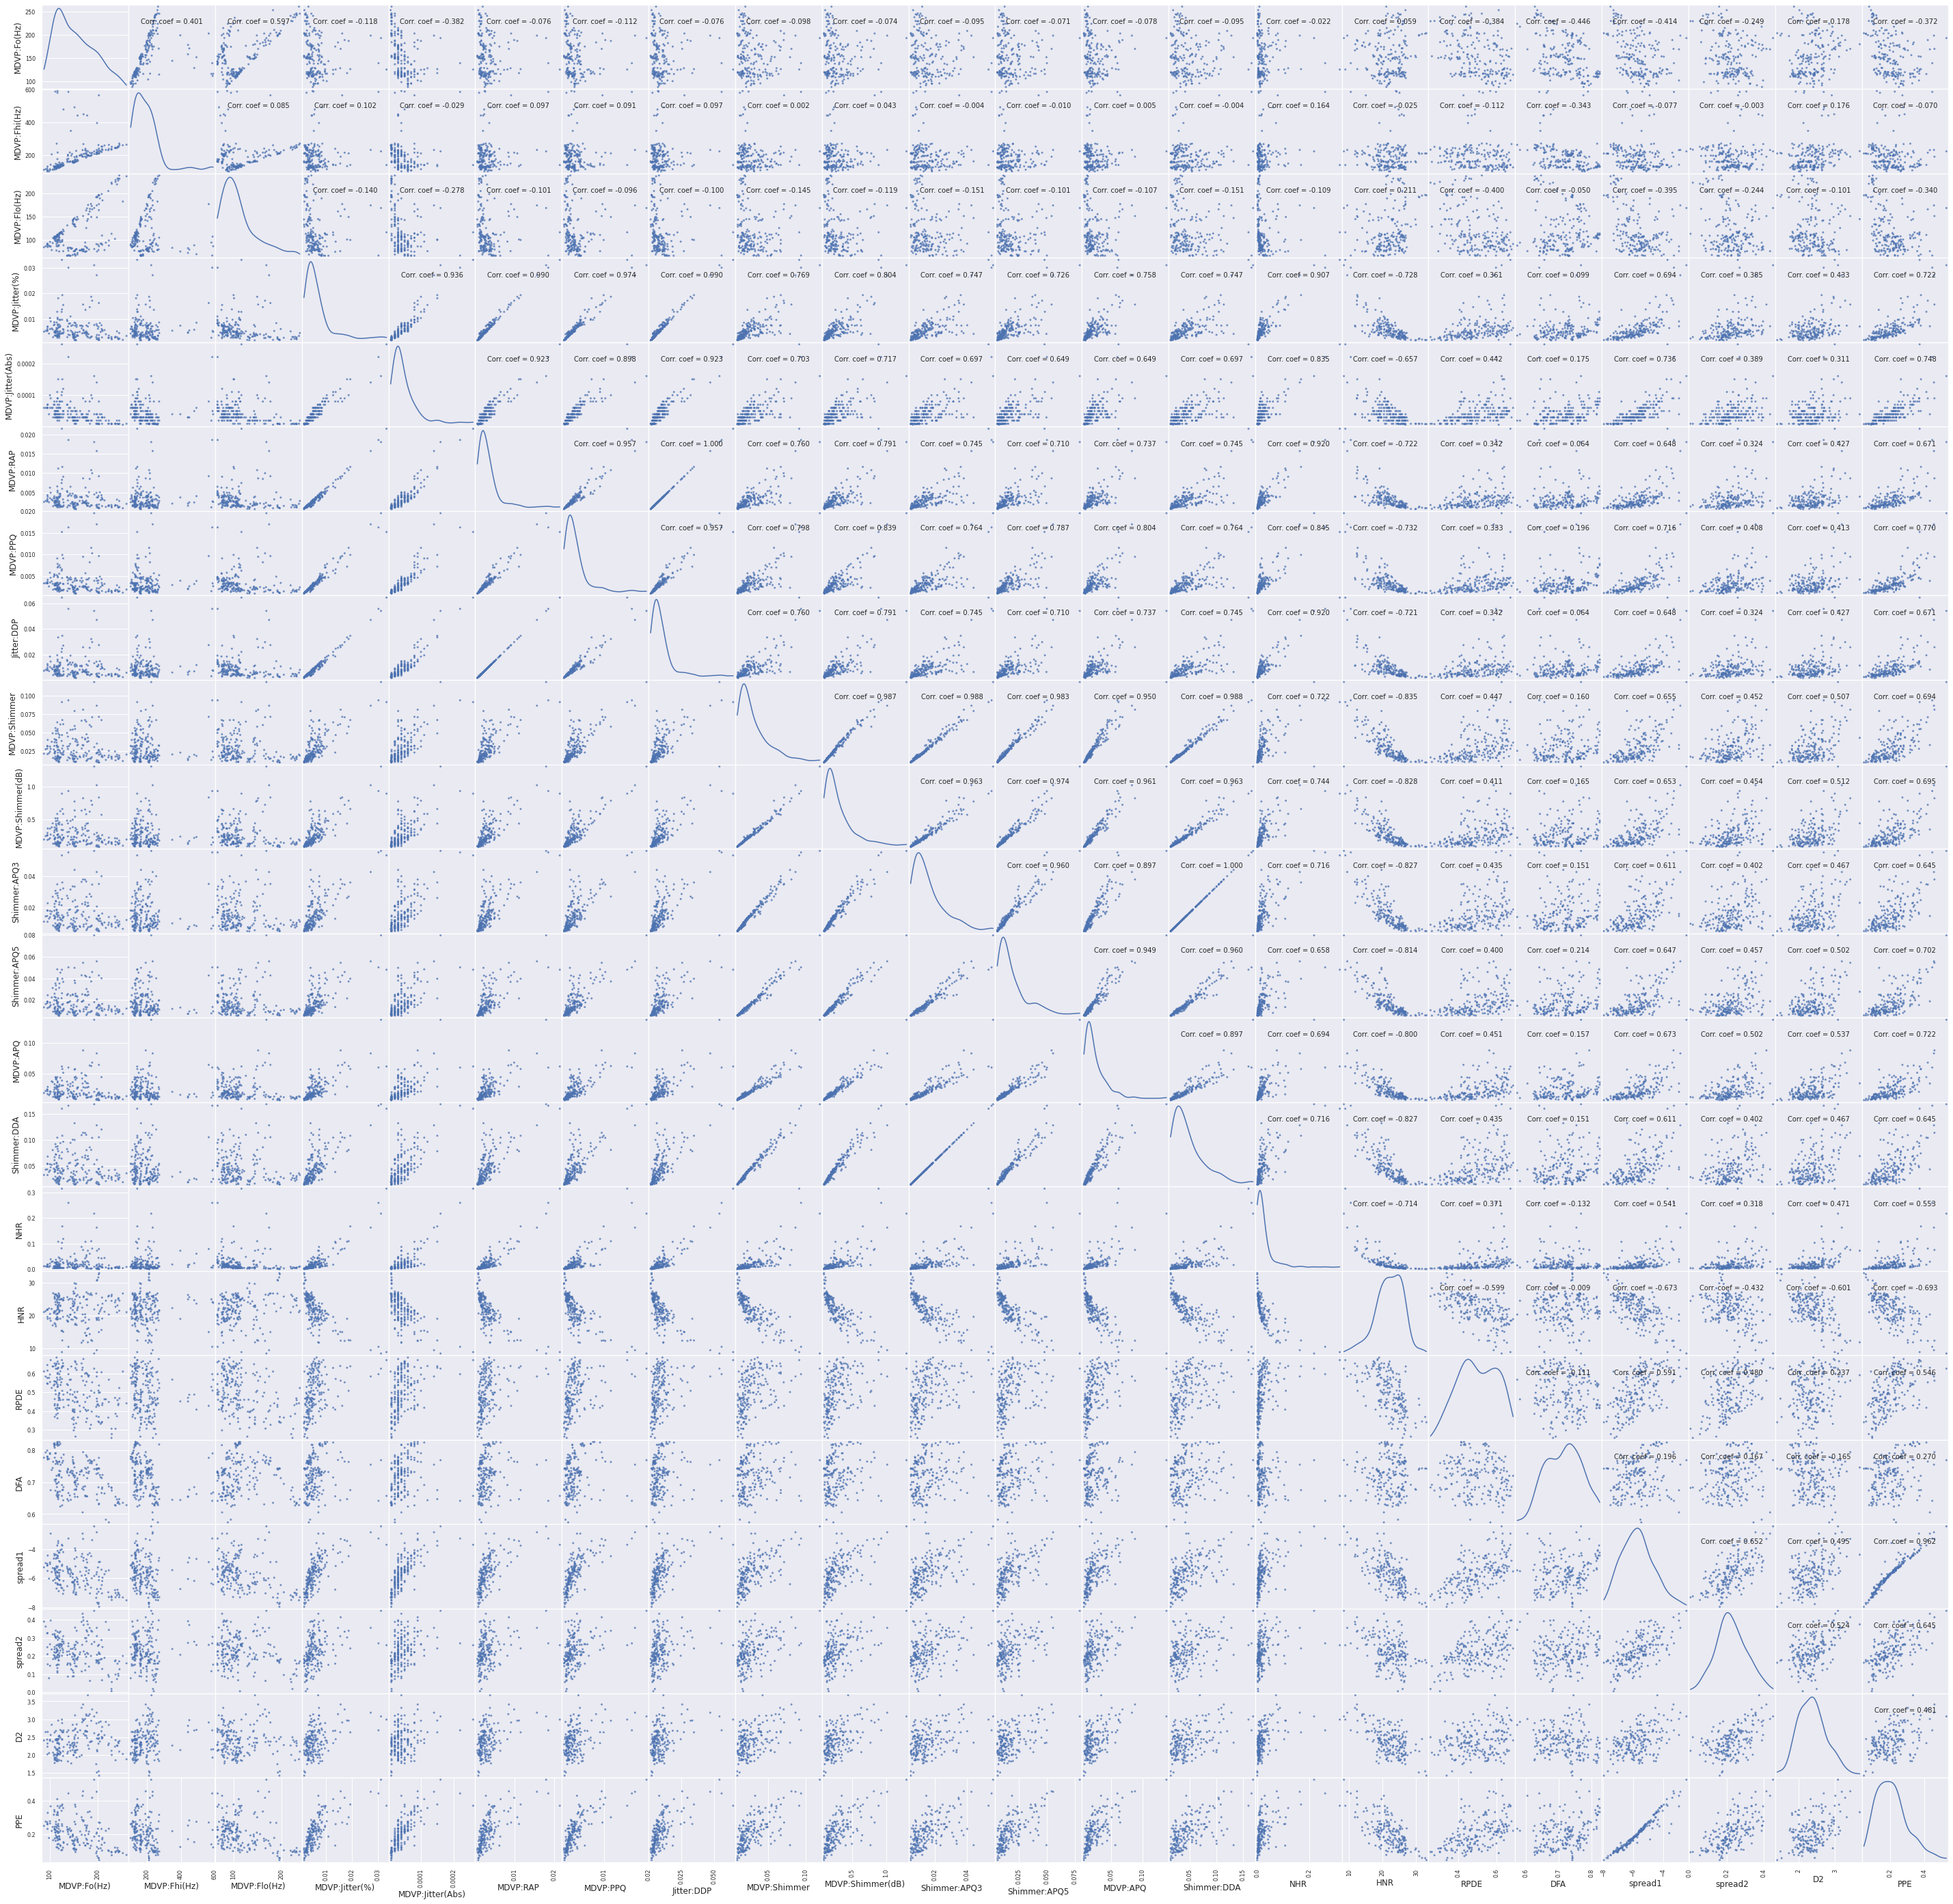

In [ ]:
plotScatterMatrix(df_features, 50, 10)

# **Feature Selection**

# I) Filter Method

In [ ]:
df_features.plot(backend = "plotly", template='plotly_dark')

***1) VarianceThreshold***

In [ ]:
# variance of each variable
df_features.var(axis=0)

MDVP:Fo(Hz)         1.713137e+03
MDVP:Fhi(Hz)        8.370703e+03
MDVP:Flo(Hz)        1.894113e+03
MDVP:Jitter(%)      2.350440e-05
MDVP:Jitter(Abs)    1.212565e-09
MDVP:RAP            8.807685e-06
MDVP:PPQ            7.611952e-06
Jitter:DDP          7.926954e-05
MDVP:Shimmer        3.555839e-04
MDVP:Shimmer(dB)    3.797716e-02
Shimmer:APQ3        1.030867e-04
Shimmer:APQ5        1.445695e-04
MDVP:APQ            2.871919e-04
Shimmer:DDA         9.277580e-04
NHR                 1.633651e-03
HNR                 1.958739e+01
RPDE                1.080388e-02
DFA                 3.062054e-03
spread1             1.188553e+00
spread2             6.956521e-03
D2                  1.465351e-01
PPE                 8.121492e-03
dtype: float64

VarianceThreshold calculates the variance of all the variables of the dataset then eliminates the variables whose variance is lower than the threshold (0.2) that you define. the purpose of this operation is to eliminate the variables which vary only very little.

indeed, what is the use of having a variable if it does not vary. i.e. if it is a constant

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold = 0.2)
selector.fit_transform(df_features)
relevant_features_Variance = df_features.columns[selector.get_support()]
print(relevant_features_Variance)

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'HNR', 'spread1'], dtype='object')


we are left with Three features:

* MDVP:Fo(Hz)
* MDVP:Fhi(Hz)
* MDVP:Flo(Hz)
* HNR
* spread1

These are the final features given by VarianceThreshold.

In [ ]:
df_features[relevant_features_Variance].plot(backend = "plotly", template='plotly_dark')

***2) Pearson correlation***

The correlation coefficient has values between -1 to 1 :
* A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
* A value closer to 1 implies stronger positive correlation
* A value closer to -1 implies stronger negative correlation

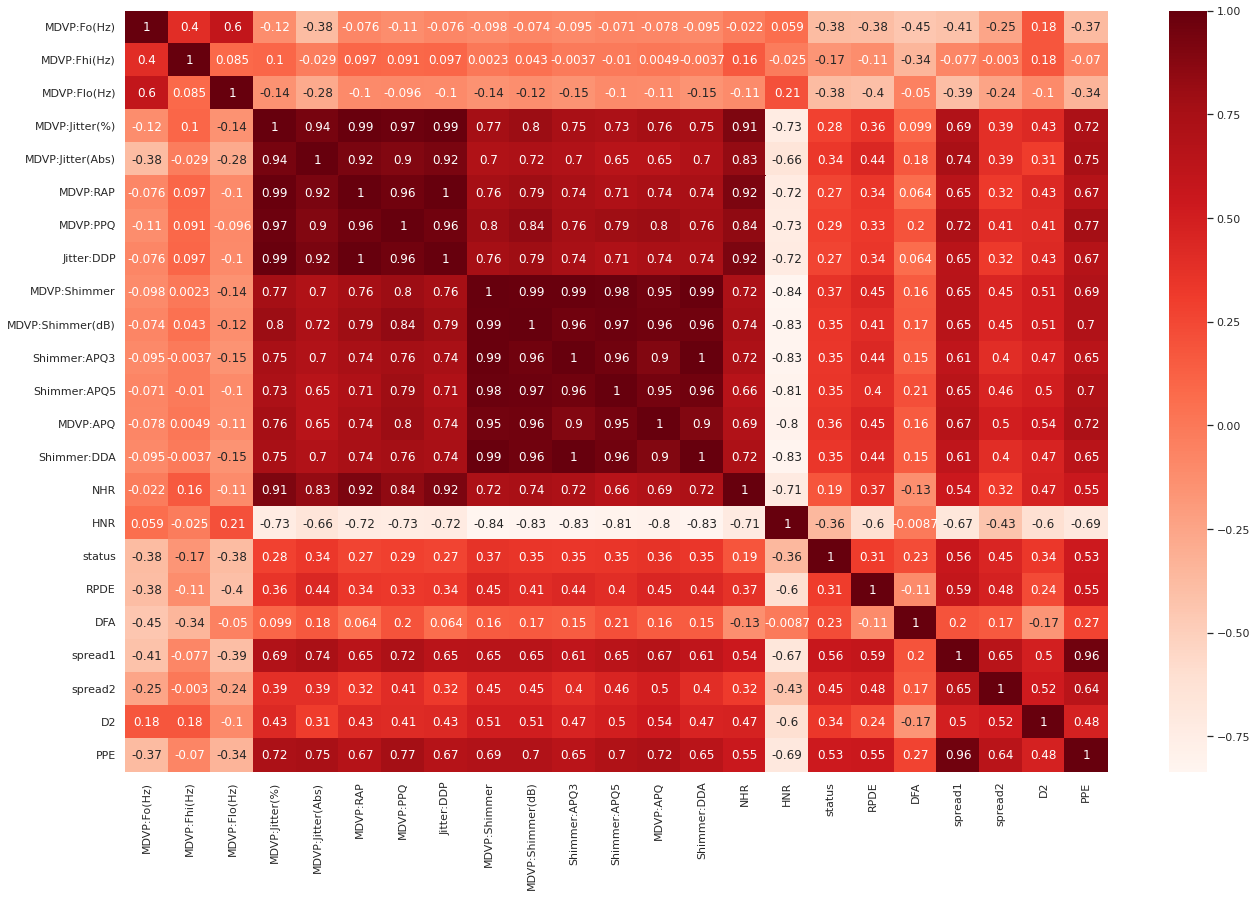

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(22,14))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(cor["status"])
#Selecting highly correlated features
relevant_features_Correlation = cor_target[cor_target>0.38]
relevant_features_Correlation = relevant_features_Correlation.drop("status")
relevant_features_Correlation

MDVP:Fo(Hz)     0.383535
MDVP:Flo(Hz)    0.380200
spread1         0.564838
spread2         0.454842
PPE             0.531039
Name: status, dtype: float64

However this is not the end of the process. The independent variables need to be uncorrelated with each other. If these variables are correlated with each other, then we need to keep only one of them and drop the rest. So let us check the correlation of selected features with each other.

In [ ]:
print(df[relevant_features_Correlation.index].corr())

              MDVP:Fo(Hz)  MDVP:Flo(Hz)   spread1   spread2       PPE
MDVP:Fo(Hz)      1.000000      0.596546 -0.413738 -0.249450 -0.372356
MDVP:Flo(Hz)     0.596546      1.000000 -0.394857 -0.243829 -0.340071
spread1         -0.413738     -0.394857  1.000000  0.652358  0.962435
spread2         -0.249450     -0.243829  0.652358  1.000000  0.644711
PPE             -0.372356     -0.340071  0.962435  0.644711  1.000000


It is seen that the variables:
* PPE and spread1 
* PPE and spread2
* spread1 and spread2

are highly correlated with each other. Hence we would keep only one variable and drop the other. We will keep spread1 since its correlation with "status" (target) is higher than that of PPE and spread2.

In [ ]:
relevant_features_Correlation = relevant_features_Correlation.drop(["spread2","PPE"])
relevant_features_Correlation

MDVP:Fo(Hz)     0.383535
MDVP:Flo(Hz)    0.380200
spread1         0.564838
Name: status, dtype: float64

After dropping spread2 and PPE, we are left with Three features: 
* MDVP:Fo(Hz)
* MDVP:Flo(Hz) 
* spread1

These are the final features given by Pearson correlation.

In [ ]:
relevant_features_Correlation = relevant_features_Correlation.index
df_features[relevant_features_Correlation].plot(backend = "plotly", template='plotly_dark')

***3) Models for relevant features (relevant_features_Correlation and relevant_features_Variance)***

In [ ]:
#scale all the datas in the range between -1,1
scaler= MinMaxScaler((-1,1))
features_Correlation = scaler.fit_transform(df_features[relevant_features_Correlation])
features_Variance = scaler.fit_transform(df_features[relevant_features_Variance])

#split the dataset into training and testing sets where 20% data for testing purpose.
x_train_c,x_test_c,y_train_c,y_test_c=train_test_split(features_Correlation, df_target , test_size=0.2,random_state=10)
x_train_v,x_test_v,y_train_v,y_test_v=train_test_split(features_Variance, df_target , test_size=0.2,random_state=10)

In [ ]:
print("------------ features_Correlation --------------")
print('Training features Shape:', x_train_c.shape)
print('Testing features Shape:', x_test_c.shape)
print('Training target Shape:', y_train_c.shape)
print('Testing target Shape:', y_test_c.shape)
print("\n------------ features_Variance --------------")
print('Training features Shape:', x_train_v.shape)
print('Testing features Shape:', x_test_v.shape)
print('Training target Shape:', y_train_v.shape)
print('Testing target Shape:', y_test_v.shape)

------------ features_Correlation --------------
Training features Shape: (156, 3)
Testing features Shape: (39, 3)
Training target Shape: (156,)
Testing target Shape: (39,)

------------ features_Variance --------------
Training features Shape: (156, 5)
Testing features Shape: (39, 5)
Training target Shape: (156,)
Testing target Shape: (39,)


In [ ]:
# Checking status 
print("------------ features_Correlation --------------")
y = pd.DataFrame(y_train_c, columns = ['status'])
print(y.status.value_counts())
print("\n------------ features_Variance --------------")
y = pd.DataFrame(y_train_v, columns = ['status'])
print(y.status.value_counts())

------------ features_Correlation --------------
1    119
0     37
Name: status, dtype: int64

------------ features_Variance --------------
1    119
0     37
Name: status, dtype: int64


In [ ]:
# We have balanced the dataset using over-sampling using SMOTE
print("------------ features_Correlation --------------")
sm = SMOTE(random_state=7, sampling_strategy=1.0)
x_train_c, y_train_c = sm.fit_resample(x_train_c, y_train_c)
print(x_train_c.shape, y_train_c.shape)
print("\n------------ features_Variance --------------")
sm = SMOTE(random_state=7, sampling_strategy=1.0)
x_train_v, y_train_v = sm.fit_resample(x_train_v, y_train_v)
print(x_train_v.shape, y_train_v.shape)

------------ features_Correlation --------------
(238, 3) (238,)

------------ features_Variance --------------
(238, 5) (238,)


In [ ]:
# Checking status 
print("------------ features_Correlation --------------")
y = pd.DataFrame(y_train_c, columns = ['status'])
print(y.status.value_counts())
print("\n------------ features_Variance --------------")
y = pd.DataFrame(y_train_v, columns = ['status'])
print(y.status.value_counts())

------------ features_Correlation --------------
1    119
0    119
Name: status, dtype: int64

------------ features_Variance --------------
1    119
0    119
Name: status, dtype: int64


In [ ]:
import re

def get_confusion_matrix(y_test, y_pred):
    try :
      cm=confusion_matrix(y_test, y_pred)  
    except:
      cm=confusion_matrix(y_test, y_pred.round())  
    return cm

# Apply model
def get_model_accuracy(model_func, features_name, x_train, y_train, x_test, y_test) :
    model = model_func
    model.fit(x_train,y_train)
    #predict the output for x_test
    y_pred=model.predict(x_test)
    confusion_matrix = get_confusion_matrix(y_test, y_pred)
    #calculate accuracy,root mean squared error
    name = re.sub("[\(\[].*?[\)\]]", "", str(model_func))
    accuracy = str(accuracy_score(y_test, y_pred.round()))
    mean_absolute = str(mean_absolute_error(y_test, y_pred))
    root_mean_squared = str(np.sqrt(mean_squared_error(y_test, y_pred)))
    confusion_matrix = re.sub("[\n]", "", str(np.array_str(confusion_matrix)))
    pkl_filename = features_name[9:] +name+".pkl"
    with open(pkl_filename, "wb") as file :
      pickle.dump(model, file)

    return [name, features_name, accuracy, mean_absolute, root_mean_squared, confusion_matrix]

In [ ]:
models_comparaison = pd.DataFrame(columns=['Model name', 'Features', 'Accuracy', 'Mean Absolute Error', 'Root Mean Squared Error', 'Confusion Matrix'])

models = [LinearRegression(), RandomForestClassifier(random_state=2), XGBClassifier(), LogisticRegression(), 
          SVC(), DecisionTreeClassifier(), KNeighborsClassifier(), GaussianNB(), AdaBoostClassifier(),
          QuadraticDiscriminantAnalysis(), MLPClassifier(random_state=0, max_iter=1000)]

for model in models:
    models_comparaison.loc[len(models_comparaison.index)] = get_model_accuracy(model, "features_Correlation" , x_train_c, y_train_c, x_test_c, y_test_c)
    models_comparaison.loc[len(models_comparaison.index)] = get_model_accuracy(model, "features_Variance", x_train_v, y_train_v, x_test_v, y_test_v)

In [ ]:
sort_columns = ['Accuracy', 'Mean Absolute Error', 'Root Mean Squared Error']
sort_order = [False, True, True]
models_comparaison.Accuracy = models_comparaison.Accuracy.astype(float)
models_comparaison.sort_values(sort_columns, ascending = sort_order)

Model name  ...   Confusion Matrix
10         DecisionTreeClassifier  ...  [[10  1] [ 1 27]]
3          RandomForestClassifier  ...  [[11  0] [ 3 25]]
5                   XGBClassifier  ...  [[11  0] [ 3 25]]
4                   XGBClassifier  ...  [[11  0] [ 4 24]]
21                  MLPClassifier  ...  [[11  0] [ 4 24]]
2          RandomForestClassifier  ...  [[11  0] [ 5 23]]
6              LogisticRegression  ...  [[11  0] [ 5 23]]
7              LogisticRegression  ...  [[11  0] [ 5 23]]
9                             SVC  ...  [[10  1] [ 4 24]]
11         DecisionTreeClassifier  ...  [[10  1] [ 4 24]]
12           KNeighborsClassifier  ...  [[11  0] [ 5 23]]
13           KNeighborsClassifier  ...  [[10  1] [ 4 24]]
14                     GaussianNB  ...  [[10  1] [ 4 24]]
16             AdaBoostClassifier  ...  [[ 9  2] [ 3 25]]
20                  MLPClassifier  ...  [[11  0] [ 5 23]]
8                             SVC  ...  [[11  0] [ 6 22]]
15                     GaussianNB  ...  [[10  1] [ 5 23]]
17             AdaBoostClassifier  ...  [[10  1] [ 5 23]]
18  QuadraticDiscriminantAnalysis  ...  [[11  0] [ 6 22]]
0                LinearRegression  ...  [[11  0] [ 6 22]]
1                LinearRegression  ...  [[11  0] [ 6 22]]
19  QuadraticDiscriminantAnalysis  ...  [[ 9  2] [ 7 21]]

[22 rows x 6 columns]

In [ ]:
def plot_model_accuracy(models, accuracy):
    # Figure Size
    fig, ax = plt.subplots(figsize =(6, 5))
    ax.barh(models, accuracy)
    # Remove axes splines
    for s in ['top', 'bottom', 'left', 'right']: ax.spines[s].set_visible(False)
    # Remove x, y Ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad = 5)
    ax.yaxis.set_tick_params(pad = 10)
    # Add x, y gridlines
    ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)
    # Show top values
    ax.invert_yaxis()
    # Add annotation to bars
    for i in ax.patches:
        plt.text(i.get_width()-0.5, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight ='bold', color ='white')
    # Add Plot Title
    ax.set_title('Models and their Accuracy', loc ='center', )
    # Show Plot
    plt.show()

In [ ]:
models_comparaison_features_Correlation = models_comparaison[models_comparaison["Features"] == "features_Correlation"].sort_values(sort_columns, ascending = sort_order)

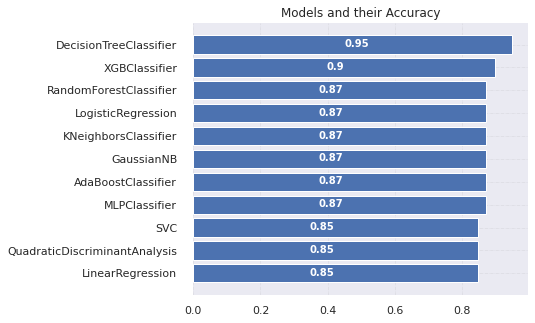

In [ ]:
models = models_comparaison_features_Correlation["Model name"]
accuracy = models_comparaison_features_Correlation["Accuracy"]
plot_model_accuracy(models, accuracy)

In [ ]:
models_comparaison_features_Variation = models_comparaison[models_comparaison["Features"] == "features_Variance"].sort_values(sort_columns, ascending = sort_order)

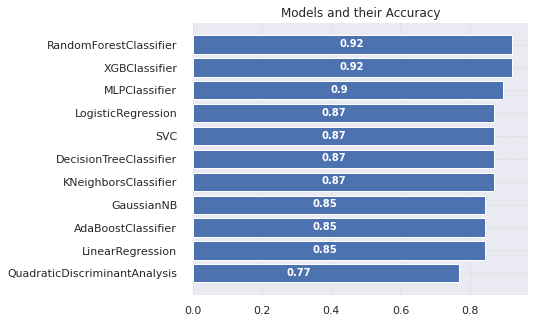

In [ ]:
models = models_comparaison_features_Variation["Model name"]
accuracy = models_comparaison_features_Variation["Accuracy"]
plot_model_accuracy(models, accuracy)

# II) Hyperparameter tuning 

***1) Logistic Regression***

In [ ]:
#Randomized search CV
x_train,x_test,y_train,y_test=train_test_split(df_features, df_target , test_size=0.2,random_state=10)

model = LogisticRegression()
solvers = ['newton-cg']
penalty = ['l2']
c_values = [100,10,1.0,0.1,0.01]
class_weight = ['balanced',None]

grid = dict(solver=solvers, penalty=penalty, C=c_values, class_weight=class_weight)
grid_search=GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, scoring='accuracy', error_score=0)
grid_result=grid_search.fit(x_train,y_train)

print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

Best: 0.820565 using {'C': 10, 'class_weight': None, 'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
#2nd logistic regression model, using recommended parameters
lr = LogisticRegression(C=10, penalty='l2', solver='newton-cg', class_weight='None')
k = 10
scores = cross_val_score(lr, x_train, y_train, cv=k)
print(f'Accuracy score for {k} folds with Logistic Model 2:', scores)
print(f'Mean score:', scores.mean())

Accuracy score for 10 folds with Logistic Model 2: [0.8125     0.8125     0.75       0.6875     0.8125     0.875
 0.8        0.86666667 0.93333333 0.86666667]
Mean score: 0.8216666666666667


In [ ]:
#Testing the logistic regression
lr.fit(x_train, y_train)
print('Test set score for Logistic Regression:', lr.score(x_test, y_test))

Test set score for Logistic Regression: 0.9743589743589743


In [ ]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(lr, open(filename, 'wb'))

In [ ]:
scaler= MinMaxScaler((-1,1))
#input data and transform into numpy array
def Prediction_System(model):
    in_data= np.asarray(tuple(map(float,input("Enter the data:\n").rstrip().split(','))))
    #reshape and scale the input array
    in_data_re = in_data.reshape(1,-1)
    in_data_sca = in_data_re
    print(type(in_data_sca))
    print(model.predict(in_data_sca).round())
    #print the predicted output for input array
    print("Parkinson's Disease Detected\n" if model.predict(in_data_sca).round()
          else "No Parkinson's Disease Detected\n")
    
Prediction_System(lr)

<class 'numpy.ndarray'>
[1]
Parkinson's Disease Detected



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



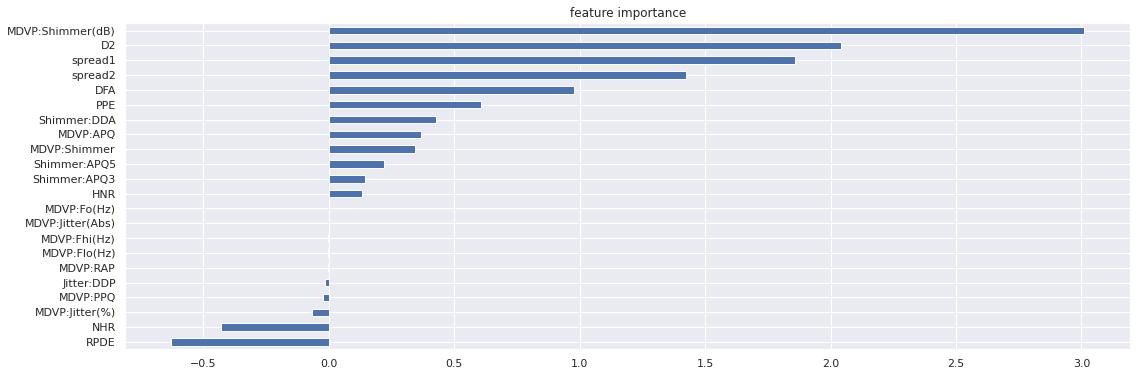

In [ ]:
#Make a visualization of the coefficients 
plt.figure(figsize=(18,6))
plt.title("feature importance")
coefficients = pd.Series(lr.coef_[0], x_train.columns)
coefficients.sort_values().plot.barh();

***2) Random Forest Classifier***

In [ ]:
rf = RandomForestRegressor(random_state = 42)
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [ ]:
#2nd RandomForestClassifier model, using recommended parameters
rf = RandomForestClassifier(bootstrap = False,
                           max_depth = None,
                            max_features = 'sqrt',
                            min_samples_leaf = 1,
                            min_samples_split = 2,
                            n_estimators = 400)
k = 10
scores = cross_val_score(rf, x_train, y_train, cv=k)
print(f'Accuracy score for {k} folds with RandomForestClassifier Model :', scores)
print(f'Mean score:', scores.mean())

Accuracy score for 10 folds with RandomForestClassifier Model : [0.8125     0.9375     0.8125     0.8125     0.875      0.9375
 0.93333333 0.93333333 1.         0.93333333]
Mean score: 0.89875


In [ ]:
#Testing the RandomForestClassifier
rf.fit(x_train, y_train)
print('Test set score for RandomForestClassifier:', rf.score(x_test, y_test))

Test set score for RandomForestClassifier: 0.9743589743589743


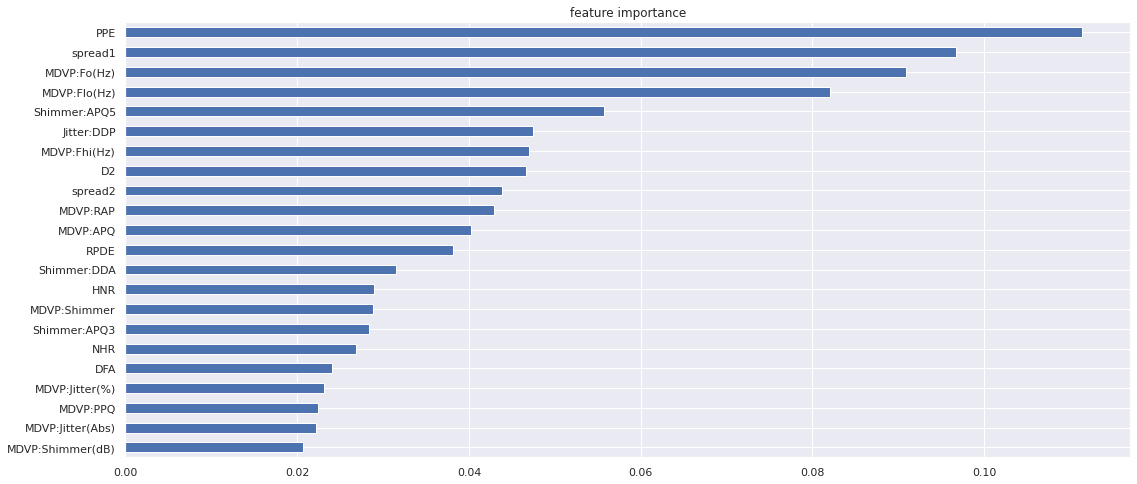

In [ ]:
importances = pd.Series(rf.feature_importances_, x_train.columns)
plt.figure(figsize=(18,8))
plt.title("feature importance")
importances.sort_values().plot.barh();

# **TEST MODELS**

In [ ]:
#extract features but we don't want 'name' and 'status' columns
#so we will drop these two columns and store remainings
#axis 1 is for columns 
features = df.drop(['name','status'],axis=1)

In [ ]:
#our target will be 'status'
target = df.loc[:,'status']

In [ ]:
#scale all the datas in the range between -1,1
scaler= MinMaxScaler((-1,1))
features_c=scaler.fit_transform(features)

In [ ]:
#split the dataset into training and testing sets where 20% data for testing purpose.
x_train,x_test,y_train,y_test=train_test_split(features_c, target , test_size=0.2,random_state=10)

In [ ]:
print('Training features Shape:', x_train.shape)
print('Testing features Shape:', x_test.shape)
print('Training target Shape:', y_train.shape)
print('Testing target Shape:', y_test.shape)

Training features Shape: (156, 22)
Testing features Shape: (39, 22)
Training target Shape: (156,)
Testing target Shape: (39,)


In [ ]:
# Checking status 
y = pd.DataFrame(y_train, columns = ['status'])
y.status.value_counts()

1    119
0     37
Name: status, dtype: int64

In [ ]:
# We have balanced the dataset using over-sampling using SMOTE
#sm = SMOTE(random_state=7, sampling_strategy=1.0)
#x_train, y_train = sm.fit_resample(x_train, y_train)
#x_train.shape, y_train.shape

In [ ]:
# Checking status 
#y = pd.DataFrame(y_train, columns = ['status'])
#y.status.value_counts()

# LinearRegression

In [ ]:
#initialize the random forest classifier and fit the datas
model_0 = LinearRegression()
model_0.fit(x_train,y_train)

LinearRegression()

In [ ]:
#predict the output for x_test
y_pred=model_0.predict(x_test)

In [ ]:
#calculate accuracy,root mean squared error
print("Accuracy :",accuracy_score(y_test, y_pred.round()))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Accuracy : 0.9230769230769231
Mean Absolute Error: 0.19773761524611816
Root Mean Squared Error: 0.2610379300763789


In [ ]:
#input data and transform into numpy array
def Prediction_System(model):
    in_data= np.asarray(tuple(map(float,input("Enter the data:\n").rstrip().split(','))))
    #reshape and scale the input array
    in_data_re = in_data.reshape(1,-1)
    in_data_sca = scaler.transform(in_data_re)
    print(model.predict(in_data_sca).round())
    #print the predicted output for input array
    print("Parkinson's Disease Detected\n" if model.predict(in_data_sca).round()
          else "No Parkinson's Disease Detected\n")
    
Prediction_System(model_0)
# 0 : 116.84800,217.55200,99.50300,0.00531,0.00005,0.00260,0.00346,0.00780,0.01795,0.16300,0.00810,0.01144,0.01756,0.02429,0.01179,22.08500,0.663842,0.656516,-5.198864,0.206768,2.120412,0.252404
# 1 : 148.79000,158.35900,138.99000,0.00309,0.00002,0.00152,0.00186,0.00456,0.01574,0.14200,0.00839,0.00956,0.01309,0.02518,0.00488,24.41200,0.402591,0.762508,-6.311987,0.182459,2.251553,0.160306
# 1 : 148.46200,161.07800,141.99800,0.00397,0.00003,0.00202,0.00235,0.00605,0.01831,0.16300,0.00950,0.01103,0.01559,0.02849,0.00639,22.86600,0.408598,0.768845,-5.704053,0.216204,2.679185,0.197710

Enter the data:
116.84800,217.55200,99.50300,0.00531,0.00005,0.00260,0.00346,0.00780,0.01795,0.16300,0.00810,0.01144,0.01756,0.02429,0.01179,22.08500,0.663842,0.656516,-5.198864,0.206768,2.120412,0.252404
[1.]
Parkinson's Disease Detected



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



# RandomForestClassifier

In [ ]:
model_1 = RandomForestClassifier(random_state=2)
model_1.fit(x_train,y_train)

RandomForestClassifier(random_state=2)

In [ ]:
y_pred=model_1.predict(x_test)

In [ ]:
#calculate accuracy,root mean squared error
print("Accuracy :",accuracy_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Accuracy : 0.9743589743589743
Mean Absolute Error: 0.02564102564102564
Root Mean Squared Error: 0.16012815380508713


In [ ]:
Prediction_System(model_1)
# 0 : 116.84800,217.55200,99.50300,0.00531,0.00005,0.00260,0.00346,0.00780,0.01795,0.16300,0.00810,0.01144,0.01756,0.02429,0.01179,22.08500,0.663842,0.656516,-5.198864,0.206768,2.120412,0.252404
# 1 : 148.79000,158.35900,138.99000,0.00309,0.00002,0.00152,0.00186,0.00456,0.01574,0.14200,0.00839,0.00956,0.01309,0.02518,0.00488,24.41200,0.402591,0.762508,-6.311987,0.182459,2.251553,0.160306
# 1 : 148.46200,161.07800,141.99800,0.00397,0.00003,0.00202,0.00235,0.00605,0.01831,0.16300,0.00950,0.01103,0.01559,0.02849,0.00639,22.86600,0.408598,0.768845,-5.704053,0.216204,2.679185,0.197710

Enter the data:
116.84800,217.55200,99.50300,0.00531,0.00005,0.00260,0.00346,0.00780,0.01795,0.16300,0.00810,0.01144,0.01756,0.02429,0.01179,22.08500,0.663842,0.656516,-5.198864,0.206768,2.120412,0.252404
[0]
No Parkinson's Disease Detected



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



# XGBClassifier

In [ ]:
model_2 =XGBClassifier()
model_2.fit(x_train,y_train)

XGBClassifier()

In [ ]:
y_pred=model_2.predict(x_test)

In [ ]:
#calculate accuracy,root mean squared error
print("Accuracy :",accuracy_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Accuracy : 1.0
Mean Absolute Error: 0.0
Root Mean Squared Error: 0.0


In [ ]:
Prediction_System(model_2)
    
# 0 : 116.84800,217.55200,99.50300,0.00531,0.00005,0.00260,0.00346,0.00780,0.01795,0.16300,0.00810,0.01144,0.01756,0.02429,0.01179,22.08500,0.663842,0.656516,-5.198864,0.206768,2.120412,0.252404
# 1 : 148.79000,158.35900,138.99000,0.00309,0.00002,0.00152,0.00186,0.00456,0.01574,0.14200,0.00839,0.00956,0.01309,0.02518,0.00488,24.41200,0.402591,0.762508,-6.311987,0.182459,2.251553,0.160306
# 1 : 148.46200,161.07800,141.99800,0.00397,0.00003,0.00202,0.00235,0.00605,0.01831,0.16300,0.00950,0.01103,0.01559,0.02849,0.00639,22.86600,0.408598,0.768845,-5.704053,0.216204,2.679185,0.197710

Enter the data:
116.84800,217.55200,99.50300,0.00531,0.00005,0.00260,0.00346,0.00780,0.01795,0.16300,0.00810,0.01144,0.01756,0.02429,0.01179,22.08500,0.663842,0.656516,-5.198864,0.206768,2.120412,0.252404
[0]
No Parkinson's Disease Detected



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



# Logistic Regression


In [ ]:
model_3 = LogisticRegression()
model_3.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred=model_3.predict(x_test)

In [ ]:
#calculate accuracy,root mean squared error
print("Accuracy :",accuracy_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Accuracy : 0.9230769230769231
Mean Absolute Error: 0.07692307692307693
Root Mean Squared Error: 0.2773500981126146


In [ ]:
Prediction_System(model_3)
    
# 0 : 116.84800,217.55200,99.50300,0.00531,0.00005,0.00260,0.00346,0.00780,0.01795,0.16300,0.00810,0.01144,0.01756,0.02429,0.01179,22.08500,0.663842,0.656516,-5.198864,0.206768,2.120412,0.252404
# 1 : 148.79000,158.35900,138.99000,0.00309,0.00002,0.00152,0.00186,0.00456,0.01574,0.14200,0.00839,0.00956,0.01309,0.02518,0.00488,24.41200,0.402591,0.762508,-6.311987,0.182459,2.251553,0.160306
# 1 : 148.46200,161.07800,141.99800,0.00397,0.00003,0.00202,0.00235,0.00605,0.01831,0.16300,0.00950,0.01103,0.01559,0.02849,0.00639,22.86600,0.408598,0.768845,-5.704053,0.216204,2.679185,0.197710

Enter the data:
116.84800,217.55200,99.50300,0.00531,0.00005,0.00260,0.00346,0.00780,0.01795,0.16300,0.00810,0.01144,0.01756,0.02429,0.01179,22.08500,0.663842,0.656516,-5.198864,0.206768,2.120412,0.252404
[1]
Parkinson's Disease Detected



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



# Support Vector Machine (SVM)

In [ ]:
model_4=SVC()
model_4.fit(x_train, y_train)

SVC()

In [ ]:
y_pred=model_4.predict(x_test)

In [ ]:
#calculate accuracy,root mean squared error
print("Accuracy :",accuracy_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Accuracy : 0.8974358974358975
Mean Absolute Error: 0.10256410256410256
Root Mean Squared Error: 0.32025630761017426


In [ ]:
Prediction_System(model_4)
    
# 0 : 116.84800,217.55200,99.50300,0.00531,0.00005,0.00260,0.00346,0.00780,0.01795,0.16300,0.00810,0.01144,0.01756,0.02429,0.01179,22.08500,0.663842,0.656516,-5.198864,0.206768,2.120412,0.252404
# 1 : 148.79000,158.35900,138.99000,0.00309,0.00002,0.00152,0.00186,0.00456,0.01574,0.14200,0.00839,0.00956,0.01309,0.02518,0.00488,24.41200,0.402591,0.762508,-6.311987,0.182459,2.251553,0.160306
# 1 : 148.46200,161.07800,141.99800,0.00397,0.00003,0.00202,0.00235,0.00605,0.01831,0.16300,0.00950,0.01103,0.01559,0.02849,0.00639,22.86600,0.408598,0.768845,-5.704053,0.216204,2.679185,0.197710

Enter the data:
116.84800,217.55200,99.50300,0.00531,0.00005,0.00260,0.00346,0.00780,0.01795,0.16300,0.00810,0.01144,0.01756,0.02429,0.01179,22.08500,0.663842,0.656516,-5.198864,0.206768,2.120412,0.252404
[1]
Parkinson's Disease Detected



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



# Support Vector Machine (Polynomial)

In [ ]:
model_4_1=SVC(kernel='poly', degree=3) # Polynomial 
model_4_1.fit(x_train, y_train)

SVC(kernel='poly')

In [ ]:
y_pred=model_4_1.predict(x_test)

In [ ]:
#calculate accuracy,root mean squared error
print("Accuracy :",accuracy_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Accuracy : 1.0
Mean Absolute Error: 0.0
Root Mean Squared Error: 0.0


In [ ]:
Prediction_System(model_4_1)
    
# 0 : 116.84800,217.55200,99.50300,0.00531,0.00005,0.00260,0.00346,0.00780,0.01795,0.16300,0.00810,0.01144,0.01756,0.02429,0.01179,22.08500,0.663842,0.656516,-5.198864,0.206768,2.120412,0.252404
# 1 : 148.79000,158.35900,138.99000,0.00309,0.00002,0.00152,0.00186,0.00456,0.01574,0.14200,0.00839,0.00956,0.01309,0.02518,0.00488,24.41200,0.402591,0.762508,-6.311987,0.182459,2.251553,0.160306
# 1 : 148.46200,161.07800,141.99800,0.00397,0.00003,0.00202,0.00235,0.00605,0.01831,0.16300,0.00950,0.01103,0.01559,0.02849,0.00639,22.86600,0.408598,0.768845,-5.704053,0.216204,2.679185,0.197710

Enter the data:
116.84800,217.55200,99.50300,0.00531,0.00005,0.00260,0.00346,0.00780,0.01795,0.16300,0.00810,0.01144,0.01756,0.02429,0.01179,22.08500,0.663842,0.656516,-5.198864,0.206768,2.120412,0.252404
[1]
Parkinson's Disease Detected



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



# Decision Tree

In [ ]:
model_5=DecisionTreeClassifier()
model_5.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=model_5.predict(x_test)

In [ ]:
#calculate accuracy,root mean squared error
print("Accuracy :",accuracy_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Accuracy : 0.9487179487179487
Mean Absolute Error: 0.05128205128205128
Root Mean Squared Error: 0.22645540682891915


In [ ]:
Prediction_System(model_5)
    
# 0 : 116.84800,217.55200,99.50300,0.00531,0.00005,0.00260,0.00346,0.00780,0.01795,0.16300,0.00810,0.01144,0.01756,0.02429,0.01179,22.08500,0.663842,0.656516,-5.198864,0.206768,2.120412,0.252404
# 1 : 148.79000,158.35900,138.99000,0.00309,0.00002,0.00152,0.00186,0.00456,0.01574,0.14200,0.00839,0.00956,0.01309,0.02518,0.00488,24.41200,0.402591,0.762508,-6.311987,0.182459,2.251553,0.160306
# 1 : 148.46200,161.07800,141.99800,0.00397,0.00003,0.00202,0.00235,0.00605,0.01831,0.16300,0.00950,0.01103,0.01559,0.02849,0.00639,22.86600,0.408598,0.768845,-5.704053,0.216204,2.679185,0.197710

Enter the data:
116.84800,217.55200,99.50300,0.00531,0.00005,0.00260,0.00346,0.00780,0.01795,0.16300,0.00810,0.01144,0.01756,0.02429,0.01179,22.08500,0.663842,0.656516,-5.198864,0.206768,2.120412,0.252404
[0]
No Parkinson's Disease Detected



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



# K-Nearest Neighbors

In [ ]:
model_6=KNeighborsClassifier()
model_6.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred=model_6.predict(x_test)

In [ ]:
#calculate accuracy,root mean squared error
print("Accuracy :",accuracy_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Accuracy : 0.9743589743589743
Mean Absolute Error: 0.02564102564102564
Root Mean Squared Error: 0.16012815380508713


In [ ]:
Prediction_System(model_6)
    
# 0 : 116.84800,217.55200,99.50300,0.00531,0.00005,0.00260,0.00346,0.00780,0.01795,0.16300,0.00810,0.01144,0.01756,0.02429,0.01179,22.08500,0.663842,0.656516,-5.198864,0.206768,2.120412,0.252404
# 1 : 148.79000,158.35900,138.99000,0.00309,0.00002,0.00152,0.00186,0.00456,0.01574,0.14200,0.00839,0.00956,0.01309,0.02518,0.00488,24.41200,0.402591,0.762508,-6.311987,0.182459,2.251553,0.160306
# 1 : 148.46200,161.07800,141.99800,0.00397,0.00003,0.00202,0.00235,0.00605,0.01831,0.16300,0.00950,0.01103,0.01559,0.02849,0.00639,22.86600,0.408598,0.768845,-5.704053,0.216204,2.679185,0.197710

Enter the data:
116.84800,217.55200,99.50300,0.00531,0.00005,0.00260,0.00346,0.00780,0.01795,0.16300,0.00810,0.01144,0.01756,0.02429,0.01179,22.08500,0.663842,0.656516,-5.198864,0.206768,2.120412,0.252404
[0]
No Parkinson's Disease Detected



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



# Gaussian Naive Bayes

In [ ]:
model_7=GaussianNB()
model_7.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred=model_7.predict(x_test)

In [ ]:
#calculate accuracy,root mean squared error
print("Accuracy :",accuracy_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Accuracy : 0.7435897435897436
Mean Absolute Error: 0.2564102564102564
Root Mean Squared Error: 0.5063696835418333


In [ ]:
Prediction_System(model_7)
    
# 0 : 116.84800,217.55200,99.50300,0.00531,0.00005,0.00260,0.00346,0.00780,0.01795,0.16300,0.00810,0.01144,0.01756,0.02429,0.01179,22.08500,0.663842,0.656516,-5.198864,0.206768,2.120412,0.252404
# 1 : 148.79000,158.35900,138.99000,0.00309,0.00002,0.00152,0.00186,0.00456,0.01574,0.14200,0.00839,0.00956,0.01309,0.02518,0.00488,24.41200,0.402591,0.762508,-6.311987,0.182459,2.251553,0.160306
# 1 : 148.46200,161.07800,141.99800,0.00397,0.00003,0.00202,0.00235,0.00605,0.01831,0.16300,0.00950,0.01103,0.01559,0.02849,0.00639,22.86600,0.408598,0.768845,-5.704053,0.216204,2.679185,0.197710

Enter the data:
116.84800,217.55200,99.50300,0.00531,0.00005,0.00260,0.00346,0.00780,0.01795,0.16300,0.00810,0.01144,0.01756,0.02429,0.01179,22.08500,0.663842,0.656516,-5.198864,0.206768,2.120412,0.252404
[0]
No Parkinson's Disease Detected



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



# AdaBoost Classifier

In [ ]:
model_8=AdaBoostClassifier()
model_8.fit(x_train, y_train)

AdaBoostClassifier()

In [ ]:
y_pred=model_8.predict(x_test)

In [ ]:
#calculate accuracy,root mean squared error
print("Accuracy :",accuracy_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Accuracy : 0.9230769230769231
Mean Absolute Error: 0.07692307692307693
Root Mean Squared Error: 0.2773500981126146


In [ ]:
Prediction_System(model_8)
    
# 0 : 116.84800,217.55200,99.50300,0.00531,0.00005,0.00260,0.00346,0.00780,0.01795,0.16300,0.00810,0.01144,0.01756,0.02429,0.01179,22.08500,0.663842,0.656516,-5.198864,0.206768,2.120412,0.252404
# 1 : 148.79000,158.35900,138.99000,0.00309,0.00002,0.00152,0.00186,0.00456,0.01574,0.14200,0.00839,0.00956,0.01309,0.02518,0.00488,24.41200,0.402591,0.762508,-6.311987,0.182459,2.251553,0.160306
# 1 : 148.46200,161.07800,141.99800,0.00397,0.00003,0.00202,0.00235,0.00605,0.01831,0.16300,0.00950,0.01103,0.01559,0.02849,0.00639,22.86600,0.408598,0.768845,-5.704053,0.216204,2.679185,0.197710

Enter the data:
116.84800,217.55200,99.50300,0.00531,0.00005,0.00260,0.00346,0.00780,0.01795,0.16300,0.00810,0.01144,0.01756,0.02429,0.01179,22.08500,0.663842,0.656516,-5.198864,0.206768,2.120412,0.252404
[0]
No Parkinson's Disease Detected



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



# Quadratic Discriminant Analysis

In [ ]:
model_9=QuadraticDiscriminantAnalysis()
model_9.fit(x_train, y_train)

QuadraticDiscriminantAnalysis()

In [ ]:
y_pred=model_9.predict(x_test)

In [ ]:
#calculate accuracy,root mean squared error
print("Accuracy :",accuracy_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Accuracy : 0.9230769230769231
Mean Absolute Error: 0.07692307692307693
Root Mean Squared Error: 0.2773500981126146


In [ ]:
Prediction_System(model_9)
    
# 0 : 116.84800,217.55200,99.50300,0.00531,0.00005,0.00260,0.00346,0.00780,0.01795,0.16300,0.00810,0.01144,0.01756,0.02429,0.01179,22.08500,0.663842,0.656516,-5.198864,0.206768,2.120412,0.252404
# 1 : 148.79000,158.35900,138.99000,0.00309,0.00002,0.00152,0.00186,0.00456,0.01574,0.14200,0.00839,0.00956,0.01309,0.02518,0.00488,24.41200,0.402591,0.762508,-6.311987,0.182459,2.251553,0.160306
# 1 : 148.46200,161.07800,141.99800,0.00397,0.00003,0.00202,0.00235,0.00605,0.01831,0.16300,0.00950,0.01103,0.01559,0.02849,0.00639,22.86600,0.408598,0.768845,-5.704053,0.216204,2.679185,0.197710

Enter the data:
116.84800,217.55200,99.50300,0.00531,0.00005,0.00260,0.00346,0.00780,0.01795,0.16300,0.00810,0.01144,0.01756,0.02429,0.01179,22.08500,0.663842,0.656516,-5.198864,0.206768,2.120412,0.252404
[0]
No Parkinson's Disease Detected



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



# MLP Classifier

In [ ]:
model_10=QuadraticDiscriminantAnalysis()
model_10.fit(x_train, y_train)

QuadraticDiscriminantAnalysis()

In [ ]:
y_pred=model_10.predict(x_test)

In [ ]:
#calculate accuracy,root mean squared error
print("Accuracy :",accuracy_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Accuracy : 0.9230769230769231
Mean Absolute Error: 0.07692307692307693
Root Mean Squared Error: 0.2773500981126146


In [ ]:
Prediction_System(model_10)
    
# 0 : 116.84800,217.55200,99.50300,0.00531,0.00005,0.00260,0.00346,0.00780,0.01795,0.16300,0.00810,0.01144,0.01756,0.02429,0.01179,22.08500,0.663842,0.656516,-5.198864,0.206768,2.120412,0.252404
# 1 : 148.79000,158.35900,138.99000,0.00309,0.00002,0.00152,0.00186,0.00456,0.01574,0.14200,0.00839,0.00956,0.01309,0.02518,0.00488,24.41200,0.402591,0.762508,-6.311987,0.182459,2.251553,0.160306
# 1 : 148.46200,161.07800,141.99800,0.00397,0.00003,0.00202,0.00235,0.00605,0.01831,0.16300,0.00950,0.01103,0.01559,0.02849,0.00639,22.86600,0.408598,0.768845,-5.704053,0.216204,2.679185,0.197710

Enter the data:
116.84800,217.55200,99.50300,0.00531,0.00005,0.00260,0.00346,0.00780,0.01795,0.16300,0.00810,0.01144,0.01756,0.02429,0.01179,22.08500,0.663842,0.656516,-5.198864,0.206768,2.120412,0.252404
[0]
No Parkinson's Disease Detected



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



# Learning curve

In [ ]:
def plot_learning_curve(estimator,title,X,y,ylim=None,cv=None,n_jobs=-1,train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

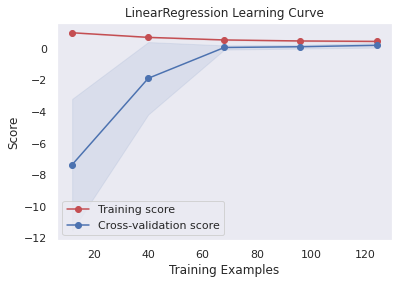

In [ ]:
g=plot_learning_curve(model_0, "LinearRegression Learning Curve",x_train,y_train)

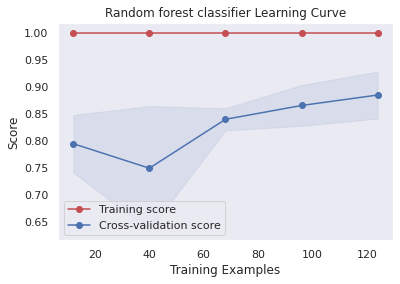

In [ ]:
g=plot_learning_curve(model_1, "Random forest classifier Learning Curve",x_train,y_train)

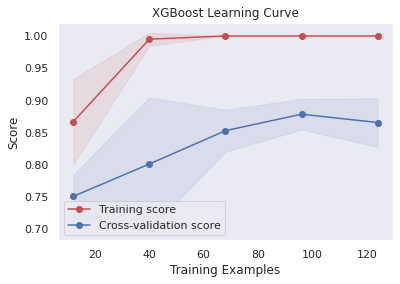

In [ ]:
g=plot_learning_curve(model_2, "XGBoost Learning Curve",x_train,y_train)

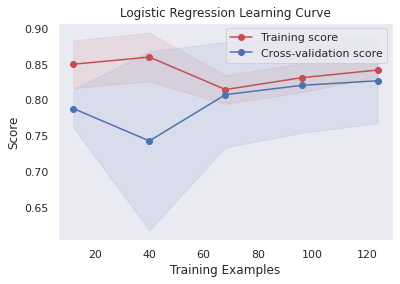

In [ ]:
g=plot_learning_curve(model_3, "Logistic Regression Learning Curve",x_train,y_train)

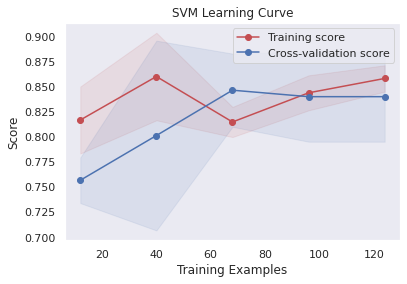

In [ ]:
g=plot_learning_curve(model_4, "SVM Learning Curve",x_train,y_train)

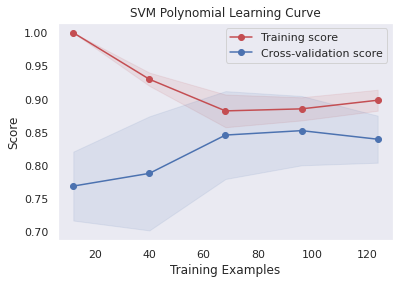

In [ ]:
g=plot_learning_curve(model_4_1, "SVM Polynomial Learning Curve",x_train,y_train)

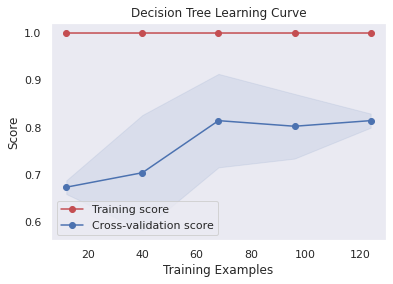

In [ ]:
g=plot_learning_curve(model_5, "Decision Tree Learning Curve",x_train,y_train)

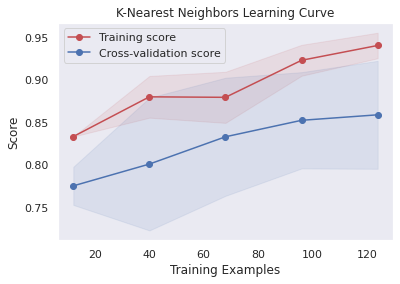

In [ ]:
g=plot_learning_curve(model_6, "K-Nearest Neighbors Learning Curve",x_train,y_train)

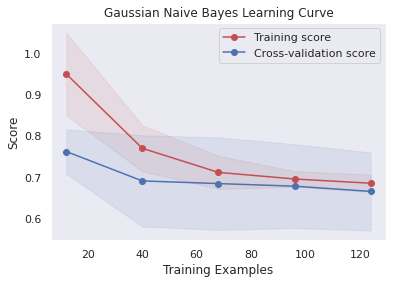

In [ ]:
g=plot_learning_curve(model_7, "Gaussian Naive Bayes Learning Curve",x_train,y_train)

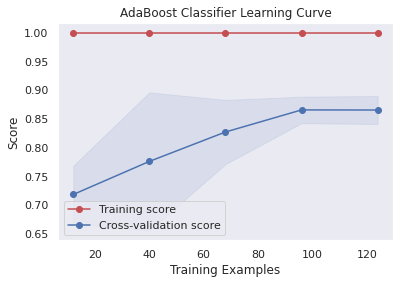

In [ ]:
g=plot_learning_curve(model_8, "AdaBoost Classifier Learning Curve",x_train,y_train)

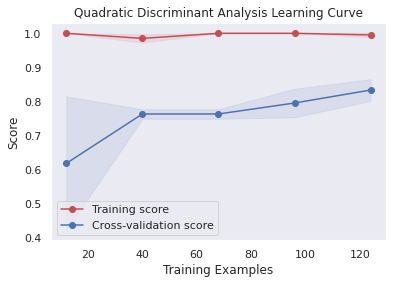

In [ ]:
g=plot_learning_curve(model_9, "Quadratic Discriminant Analysis Learning Curve",x_train,y_train)

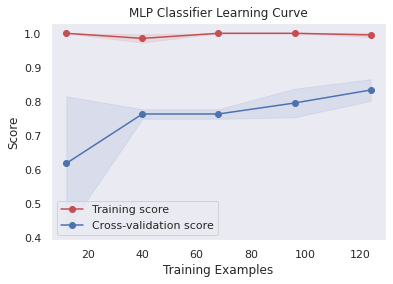

In [ ]:
g=plot_learning_curve(model_10, "MLP Classifier Learning Curve",x_train,y_train)